Actors Network
===========

In [3]:
# DISCLAIMER:
# This code might (should) contain MANY bugs, you are expected to check everything twice.

# Load the Data (RAW Data)
actors = sc.textFile('data/imdb_actors_key_noheader.tsv', 8)
print actors.count()
# Split by \t
actors_key_cat = actors.map(lambda x: tuple(x.split('\t'))).map(lambda x:(int(x[0]),(x[1],x[3]))).cache()
actors_key = actors.map(lambda x: tuple(x.split('\t'))).map(lambda x:(int(x[0]),x[1])).cache()
print "An example of 5 actors:"
print actors_key_cat.take(5)
# Verificamos que el mundo siga en pie
kevin = actors_key_cat.filter(lambda x:x[0]==3257)
print "Our hero:"
print kevin.collect()
# So far so good
# Now load the actors network
network = sc.textFile('data/imdb_actor_edges.tsv')
print network.count()
network = network.map(lambda x:tuple(x.split('\t'))).map(lambda x:(int(x[0]),int(x[1]),int(x[2]))).cache()
#network = network.map(lambda x:tuple(x.split('\t'))).map(lambda x:(int(x[0]),int(x[1])))
print "Example 5 records from network RDD:"
print network.take(5)

# Network has nodes in the form (actor1,actor2,times_acted_together)
# actors_key_cat has nodes in the form (actorid,(name,category))

17577
An example of 5 actors:
[(15629, (u'"Rudder, Michael (I)"', u'Thriller')), (5026, (u'"Morgan, Debbi"', u'Drama')), (11252, (u'"Bellows, Gil"', u'Drama')), (5150, (u'"Dray, Albert"', u'Comedy')), (4057, (u'"Daly, Shane (I)"', u'Drama'))]
Our hero:
[(3257, (u'"Bacon, Kevin"', u'Drama'))]
219
Example 5 records from network RDD:


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.runJob.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 8.0 failed 1 times, most recent failure: Lost task 0.0 in stage 8.0 (TID 37, localhost): org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/boyto/Downloads/spark-2.0.2-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/home/boyto/Downloads/spark-2.0.2-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/boyto/Downloads/spark-2.0.2-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-3-99fa3d04c28e>", line 20, in <lambda>
ValueError: invalid literal for int() with base 10: '<!DOCTYPE HTML>'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:332)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:330)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:951)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:926)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:866)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:926)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:670)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:330)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:281)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:86)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	at java.lang.Thread.run(Thread.java:745)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1454)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1442)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1441)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1441)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:811)
	at scala.Option.foreach(Option.scala:257)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:811)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1667)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1622)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1611)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:632)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1873)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1886)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1899)
	at org.apache.spark.api.python.PythonRDD$.runJob(PythonRDD.scala:441)
	at org.apache.spark.api.python.PythonRDD.runJob(PythonRDD.scala)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:57)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:237)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:280)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:214)
	at java.lang.Thread.run(Thread.java:745)
Caused by: org.apache.spark.api.python.PythonException: Traceback (most recent call last):
  File "/home/boyto/Downloads/spark-2.0.2-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 172, in main
    process()
  File "/home/boyto/Downloads/spark-2.0.2-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/worker.py", line 167, in process
    serializer.dump_stream(func(split_index, iterator), outfile)
  File "/home/boyto/Downloads/spark-2.0.2-bin-hadoop2.7/python/lib/pyspark.zip/pyspark/serializers.py", line 263, in dump_stream
    vs = list(itertools.islice(iterator, batch))
  File "<ipython-input-3-99fa3d04c28e>", line 20, in <lambda>
ValueError: invalid literal for int() with base 10: '<!DOCTYPE HTML>'

	at org.apache.spark.api.python.PythonRunner$$anon$1.read(PythonRDD.scala:193)
	at org.apache.spark.api.python.PythonRunner$$anon$1.<init>(PythonRDD.scala:234)
	at org.apache.spark.api.python.PythonRunner.compute(PythonRDD.scala:152)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:332)
	at org.apache.spark.rdd.RDD$$anonfun$8.apply(RDD.scala:330)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:951)
	at org.apache.spark.storage.BlockManager$$anonfun$doPutIterator$1.apply(BlockManager.scala:926)
	at org.apache.spark.storage.BlockManager.doPut(BlockManager.scala:866)
	at org.apache.spark.storage.BlockManager.doPutIterator(BlockManager.scala:926)
	at org.apache.spark.storage.BlockManager.getOrElseUpdate(BlockManager.scala:670)
	at org.apache.spark.rdd.RDD.getOrCompute(RDD.scala:330)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:281)
	at org.apache.spark.api.python.PythonRDD.compute(PythonRDD.scala:63)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:319)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:283)
	at org.apache.spark.scheduler.ResultTask.runTask(ResultTask.scala:70)
	at org.apache.spark.scheduler.Task.run(Task.scala:86)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:274)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1145)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:615)
	... 1 more


In [2]:
# Now we have the network in the right format, let's find the node with more different movies
mn1 = network.flatMap(lambda x:[(x[0],x[2]),(x[1],x[2])])
mn1 = mn1.reduceByKey(lambda x,y:x+y)
mn1 = mn1.join(actors_key_cat)
# Sorry about this
mn1 = mn1.filter(lambda x:x[1][1][1]!='Adult')
top_actors = mn1.takeOrdered(10,lambda x:-x[1][0])
for actor in top_actors:
    print actor[1][1][0]+':'+str(actor[1][0])
bacon_movies = mn1.filter(lambda x:x[0]==3257).take(1)
print "Kevin Bacon actua en: "+str(bacon_movies[0][1][0])+ " peliculas"

"Levesque, Paul Michael":3062
"Calaway, Mark":3029
"Ross, Jim (III)":2824
"Lawler, Jerry":2818
"McMahon, Vince":2790
"Wight, Paul":2731
"Jericho, Chris":2722
"Benoit, Chris (I)":2685
"Guerrero, Eddie":2684
"Rock, The":2675
Kevin Bacon actua en: 232 peliculas


In [3]:
# One degrees of kevin bacon
# We want a to be with 3257
kevin1 = network.filter(lambda x:x[0]==3257 or x[1]==3257).map(lambda x:x[0] if x[1]==3257 else x[1])
#print kevin1.collect()
kevin1_names = kevin1.map(lambda x:(x,1)).join(actors_key).map(lambda x:x[1][1])
#kevin1 = kevin1.map(lambda x:(x,1)).reduceByKey(lambda x,y:x+y)
# Number of actors with Bacon Degree 1
print "Actors at 1 degree of Kevin Bacon:"+str(kevin1_names.count())
bacon1_actors = kevin1_names.collect()
for actor in bacon1_actors:
    print actor

Actors at 1 degree of Kevin Bacon:101
"Danes, Claire"
"Wilson, Luke (I)"
"Taylor, Elizabeth (I)"
"Hoffman, Dustin"
"Harris, Ed (I)"
"Pollak, Kevin"
"Danson, Ted"
"Sinise, Gary"
"Hanks, Tom"
"Bisset, Jacqueline"
"Ice-T"
"Harden, Marcia Gay"
"Grant, Hugh (I)"
"Bonham Carter, Helena"
"Jackson, Janet (I)"
"Ford, Harrison (I)"
"Shue, Elisabeth"
"Jolie, Angelina"
"Gere, Richard"
"Moore, Demi"
"Keaton, Michael"
"Fishburne, Laurence"
"Quinlan, Kathleen"
"Penn, Sean"
"Robbins, Tim (I)"
"Dern, Laura"
"Leigh, Jennifer Jason"
"Cher (I)"
"Goldberg, Whoopi"
"Crudup, Billy"
"Ryan, Meg"
"Lauper, Cyndi"
"Grunberg, Greg"
"Dunn, Kevin (I)"
"Spears, Britney"
"Roberts, Julia"
"Wahlberg, Mark (I)"
"Lange, Jessica"
"Smith Jr., Eddie Bo"
"Parker, Sarah Jessica"
"Howard, Clint"
"Fonda, Bridget"
"Paxton, Bill"
"Reitman, Ivan"
"Dillon, Matt (I)"
"Spacey, Kevin"
"Lane, Diane (I)"
"Travolta, John"
"Norwood, Brandy"
"Gibson, Mel (I)"
"Brolin, Josh"
"Riegert, Peter"
"Crawford, Thomas (I)"
"Matlin, Marlee"
"Helgeland

In [4]:
import itertools
# N degrees of Kevin Bacon
# We want to build an adjacency list for the actors graph
# so if we have (A,B)(A,C)(B,C) we want (A,[B,C]),(B,[C]), etc

# First we convert each (A,B) into (A,B) and (B,A)
adjlist = network.flatMap(lambda x:[(x[0],x[1]),(x[1],x[0])])

#foo = adjlist.groupByKey().filter(lambda x:x[0]==3257).map(lambda x:(x[0],(set(x[1]))))
#print foo.take(1)
# Now we want to groupByKey and remove duplicate values from the list of neighbors
adjlist = adjlist.groupByKey().map(lambda x:(x[0],(999,'-',list(set(x[1])),0))).cache()
graph = adjlist.map(lambda x:(x[0],(x[1][2]))).cache()

print adjlist.take(1)
#adjlist = adjlist.groupByKey().filter(lambda x:x[0]==3257).map(lambda x:(x[0],(99,'-',list(set(x[1])))))

#foo = adjlist.filter(lambda x:x[0]==3257)
#.map(lambda x:(x[0],len(x[1][2])))
#print foo.take(1)

total_nodes = adjlist.count()

print "Total number of nodes in our graph:"+str(total_nodes)

# Now our RDD is in the form [(node,(distance_from_kevin,status,[neighbors])),....(node,(distance_from_kevin,status,[neighbors]))]
# The next step is to mark all nodes that are neighbors of Kevin Bacon as being at distance 1 and to be processed
# to do this we take kevin's node and generate new nodes for the neighbors in the form (node_id,(1,'P',[]))
# then the reduceByKey phase will just join all the nodes into a single one (hopefully)
# we define proc_node as the function that processes a node and we'll start from 3257 of course (Kevin)

def proc_node(node):
    # We receive a node in the form (nodeid,distance_from_kevin,status,list_of_neighbors,trace)
    # We generate new nodes for each neighbor adding 1 to the distance of the current node (!)
    if node[1][0]==999:
        new_distance = 1
    else:
        new_distance = node[1][0]+1
    ret = []
    for neighbor in node[1][2]:
        ret.append((neighbor,(new_distance,'P',[],node[0])))
    # We also update the node as already processed!
    ret.append((node[0],(node[1][0],'DONE',node[1][2],node[1][3])))
    return ret

# Now we define the reduce function
def reduce_nodes(n1,n2):
    # We receive two nodes in the form (distance_from_kevin,status,list_of_neighbors,trace)
    # We keep the minimum distance
    # if one of the nodes is marked as 'DONE' we keep 'DONE'
    # if one of the nodes is marked as 'P' we keep 'P'
    # we keep the longest list of neighbors (some can be empty)
    # We keep the trace of the minimum distance
    new_status = ''
    if n1[1]=='P' or n2[1]=='P':
        new_status = 'P'
    if n1[1]=='DONE' or n2[1]=='DONE':
        new_status = 'DONE'
    if n1[0]<n2[0]:
        new_distance = n1[0]
        trace = n1[3]
    else:
        new_distance = n2[0]
        trace = n2[3]
    new_list = n1[2]
    if len(n2[2])>len(n1[2]):
        new_list = n2[2]
    return (new_distance,new_status,new_list,trace)

# Our first task is to process only Kevin's node
adjlist = adjlist.flatMap(lambda x:proc_node(x) if x[0]==3257 else [x])
adjlist = adjlist.reduceByKey(reduce_nodes)
k_with_number = adjlist.filter(lambda x:x[1][0]<999)
print "Number of nodes with Bacon Number:"+str(k_with_number.count())+"/"+str(total_nodes)
#print "Some actors with Bacon Numbers"
#some_actors = adjlist.filter(lambda x:x[1][0]==1).map(lambda x:(x[0],1)).join(actors_key).map(lambda x:x[1][1])
#print kevin2_names.take(10)

# Our second step is to process all the 'P' nodes
adjlist = adjlist.flatMap(lambda x:proc_node(x) if x[1][1]=='P' else [x])
adjlist = adjlist.reduceByKey(reduce_nodes)
k_with_number = adjlist.filter(lambda x:x[1][0]<999)
print "Number of nodes with Bacon Number:"+str(k_with_number.count())+"/"+str(total_nodes)
#print "Some actors with Bacon Numbers"
#some_actors = adjlist.filter(lambda x:x[1][0]==1).map(lambda x:(x[0],1)).join(actors_key).map(lambda x:x[1][1])
#print kevin2_names.take(10)

for i in range(0,8):
    adjlist = adjlist.flatMap(lambda x:proc_node(x) if x[1][1]=='P' else [x])
    adjlist = adjlist.reduceByKey(reduce_nodes)
    k_with_number = adjlist.filter(lambda x:x[1][0]<999)
    print "Number of nodes with Bacon Number:"+str(k_with_number.count())+"/"+str(total_nodes)

print adjlist.filter(lambda x:x[0]==5222).collect()
# El camino es 5222-9611-4763-8473-8468
# Andrea Pietra - Pauls Gaston - Henriksen Lance - WoodRuff Jr

[(0, (999, '-', [1, 2, 3, 4, 8, 10, 25, 28], 0))]
Total number of nodes in our graph:17577
Number of nodes with Bacon Number:101/17577
Number of nodes with Bacon Number:2491/17577
Number of nodes with Bacon Number:9650/17577
Number of nodes with Bacon Number:14463/17577
Number of nodes with Bacon Number:16459/17577
Number of nodes with Bacon Number:16951/17577
Number of nodes with Bacon Number:17270/17577
Number of nodes with Bacon Number:17445/17577
Number of nodes with Bacon Number:17455/17577
Number of nodes with Bacon Number:17455/17577
[(5222, (5, 'DONE', [8000, 4672, 4676, 5224, 9611, 8016, 4787, 4692, 4789, 8020, 16276, 4767], 9611))]


In [5]:
# The average degree of the network is?
total_deg = network.flatMap(lambda x:[(x[0],1),(x[1],1)]).reduceByKey(lambda x,y:x+y)
num_actors = total_deg.count()
print "Number of actors:"+str(num_actors)
acum_deg = total_deg.map(lambda x:x[1]).reduce(lambda x,y:x+y)
print "Average degree:"+str((float(acum_deg)/num_actors)/2)


Number of actors:17577
Average degree:16.3323661603


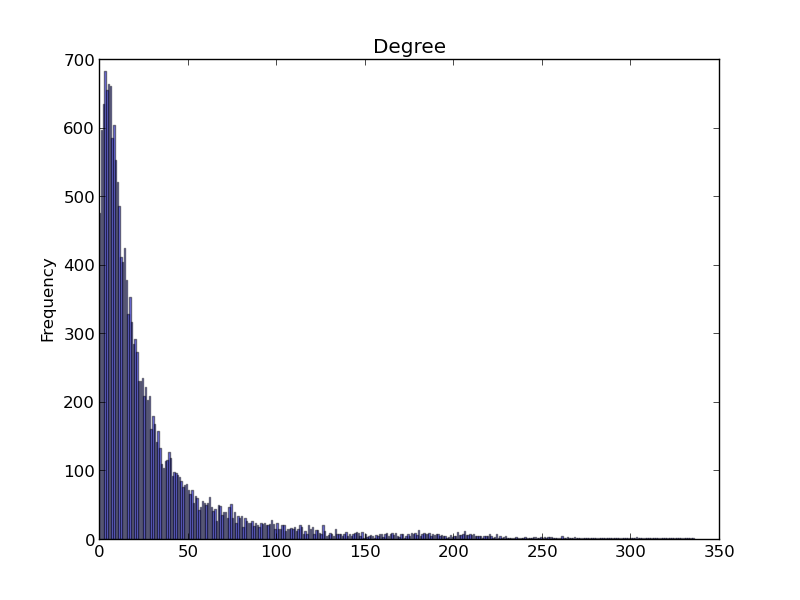

In [6]:
# Distribution of degrees
# We start with an RDD total_deg that has the form (actor_id, degree) and we want to turn it into something like
# (degree, times)
dist_deg = total_deg.map(lambda x:(x[1],1)).reduceByKey(lambda x,y:x+y).sortByKey(lambda x:-x[1])
#print dist_deg.take(10)

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

degree_freq = dist_deg.collect()
degrees = [i for i,j in degree_freq]
freqs = [j for i,j in degree_freq]

#print degrees
#print freqs

plt.close()
plt.clf()

y_pos = np.arange(len(degrees))
#print y_pos
plt.bar(y_pos, freqs, alpha=0.5)
#plt.xticks(y_pos, my_words)
plt.ylabel('Frequency')
plt.title('Degree')
 
plt.savefig('degree_dist.png')
Image("degree_dist.png")



In [7]:
# PART I
# Now let's find triangles in the actors network!
# We want to find pairs (A,B) where A never worked together with B but
# they have worked together with a common actor C many times.
# in other words (A,B) would close many triangles.

# First step put in format (A,B) where A<B for all tuples
tri = network.map(lambda x:tuple(sorted([x[0],x[1]])))
# Second step for each (A,B) create (A,(B,1)) and (B,(A,0))
tri = tri.flatMap(lambda x:[(x[1],(x[0],1)),(x[0],(x[1],0))])

def proc(key,vals):
    l0 = [node[0] for node in vals if node[1]==1]
    l1 = [node[0] for node in vals if node[1]==0]
    join = list(itertools.product(l0,l1))
    res = [(node[0],key,node[1]) for node in join]
    return res
#tri = tri.groupByKey().map(lambda x:(x[0],list(x[1])))

# THIS CAN TAKE A WHILE!
tri = tri.groupByKey().flatMap(lambda x:proc(x[0],x[1])).distinct()
print tri.take(5)
#print tri.groupByKey().map(lambda x:(x[0],list(x[1]))).take(5)
#proc(99,[(16621, 0), (16697, 0), (10, 0), (23, 0), (12181, 0), (15304, 0), (16693, 0), (0, 1), (16418, 0), (31, 0), (15297, 0), (9, 0), (43, 0), (16699, 0), (27, 0), (16695, 0), (4, 1), (5, 1), (33, 0), (18, 0), (1, 1), (14, 0), (15301, 0), (25, 0), (56, 0)])
tri.cache()


[(2911, 2913, 17217), (128, 1737, 1810), (537, 4307, 9387), (1802, 2316, 6293), (1416, 1421, 7392)]


PythonRDD[121] at RDD at PythonRDD.scala:43

In [8]:
# PART II 
# Continue, now we have an RDD where each record is in the form (A,B,C) meaning A worked with B and B worked with C 
# but we don't know if A worked with C
# so we are going to generate something in the form ((A,C),1) meaning that if (A,C) exists then it closes 1 triangle.
tri2 = tri.map(lambda x:((x[0],x[2]),1))
print tri2.take(5)
# Now we just do a reduce by key
most_triangles = tri2.reduceByKey(lambda x,y:x+y)
most_triangles.cache()

[((3112, 3118), 1), ((164, 7515), 1), ((724, 760), 1), ((1688, 1831), 1), ((150, 2665), 1)]


PythonRDD[127] at RDD at PythonRDD.scala:43

In [9]:
# PART III
# print most_triangles.takeOrdered(5,lambda x:-x[1])
# Now we want to check if this triangles exist or not so we go to network and create something like ((actor1,actor2),1)
n2 = network.map(lambda x:((x[0],x[1]),'Y'))
# We append this to the most_triangles RDD both have the same format
n2 = n2.union(most_triangles)
# Now we do a groupByKey 
n2 = n2.groupByKey()
n2 = n2.map(lambda x:(x[0],list(x[1]))).filter(lambda x:len(x[1])==1 and x[1][0]!='Y').map(lambda x:((x[0][0],x[0][1]),x[1][0]))
#print n2.takeOrdered(10,lambda x:-x[1])
# Now we have to do the joins and remove some actors
n3 = n2.map(lambda x:(x[0][0],(x[0][1],x[1])))
n3 = n3.join(actors_key_cat).filter(lambda x:x[1][1][1]!='Adult' and x[1][1][1]!='Action')
n3 = n3.map(lambda x:(x[1][0][0],(x[1][0][1],x[1][1])))
n3 = n3.join(actors_key_cat)
n3 = n3.map(lambda x:(x[1][0][1],x[1][1],x[1][0][0]))
pairs = n3.takeOrdered(50,lambda x:-x[2])
for pair in pairs:
    print pair[0][0]+' and '+pair[1][0]+' would close '+str(pair[2])+' triangles.'

"Diaz, Cameron" and "Myers, Mike (I)" would close 136 triangles.
"Barrymore, Drew" and "Myers, Mike (I)" would close 130 triangles.
"Hanks, Tom" and "Stone, Sharon (I)" would close 127 triangles.
"Ferrell, Will" and "Myers, Mike (I)" would close 126 triangles.
"Kuwashima, Houko" and "Seki, Tomokazu" would close 110 triangles.
"Carrey, Jim" and "Stone, Sharon (I)" would close 109 triangles.
"T�ma, Yumi" and "Seki, Tomokazu" would close 107 triangles.
"Hayashibara, Megumi" and "Seki, Tomokazu" would close 107 triangles.
"Stiller, Ben" and "Myers, Mike (I)" would close 106 triangles.
"Crystal, Billy" and "Myers, Mike (I)" would close 105 triangles.
"Diaz, Cameron" and "Berry, Halle" would close 105 triangles.
"Affleck, Ben" and "Stone, Sharon (I)" would close 100 triangles.
"Cruise, Tom" and "Stone, Sharon (I)" would close 98 triangles.
"Fallon, Jimmy" and "Myers, Mike (I)" would close 97 triangles.
"Diaz, Cameron" and "Spielberg, Steven" would close 96 triangles.
"Carrey, Jim" and "Myers

In [10]:
# Centrality by Random Walks!
# Select some random nodes from the graph
# From those nodes start a random walk
# Then just compute 1 for each node we have found!
import numpy as np

# First step take a random Sample from adjlist with replacement
my_sample = graph.sample(True,0.3)

# The nodes we took are part of the random walks
all_the_nodes = my_sample.map(lambda x:(x[0],1))

print "We took a sample of:"+str(my_sample.count())+" nodes"

# This function gets a node and returns a new node selecting a random neighbor
# From each node in the sample select a random neighbor
def pick_random_neighbor(node):
    neighbor = np.random.choice(node[1])
    return (neighbor,'node')

for i in range(0,50):
    # Pick a random neighbor from each node
    my_sample = my_sample.map(lambda x:pick_random_neighbor(x)).cache()
    # Join with graph to recover the list of neighbors
    my_sample = my_sample.join(graph).map(lambda x:(x[0],x[1][1])).cache()
    # Add the new nodes to the list of visited nodes
    just_nodes = my_sample.map(lambda x:(x[0],1))
    all_the_nodes = all_the_nodes.union(just_nodes).cache()
    print "Round: "+str(i)+" Total number of nodes:"+str(all_the_nodes.count())
print "----------------------------------------------------------------------"    
all_the_nodes = all_the_nodes.reduceByKey(lambda x,y:x+y)
nodes_with_names = all_the_nodes.join(actors_key_cat)
#print nodes_with_names.take(5)
central_actors =  nodes_with_names.takeOrdered(50,lambda x:-x[1][0])
i=0
for actor in central_actors:
    i=i+1
    print str(i)+". "+actor[1][1][0]+" ("+actor[1][1][1]+") = "+str(actor[1][0])

We took a sample of:5297 nodes
Round: 0 Total number of nodes:10594
Round: 1 Total number of nodes:15891
Round: 2 Total number of nodes:21188
Round: 3 Total number of nodes:26485
Round: 4 Total number of nodes:31782
Round: 5 Total number of nodes:37079
Round: 6 Total number of nodes:42376
Round: 7 Total number of nodes:47673
Round: 8 Total number of nodes:52970
Round: 9 Total number of nodes:58267
Round: 10 Total number of nodes:63564
Round: 11 Total number of nodes:68861
Round: 12 Total number of nodes:74158
Round: 13 Total number of nodes:79455
Round: 14 Total number of nodes:84752
Round: 15 Total number of nodes:90049
Round: 16 Total number of nodes:95346
Round: 17 Total number of nodes:100643
Round: 18 Total number of nodes:105940
Round: 19 Total number of nodes:111237
Round: 20 Total number of nodes:116534
Round: 21 Total number of nodes:121831
Round: 22 Total number of nodes:127128
Round: 23 Total number of nodes:132425
Round: 24 Total number of nodes:137722
Round: 25 Total numbe